<a href="https://colab.research.google.com/github/JhonAlG/Research-Test/blob/main/SMT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Import necessary libraries for access to functions/tools

In [ ]:
# Load the eflux data
df_eflux = pd.read_csv(
    r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt",
    header=None, skiprows=1, nrows=7680, delim_whitespace=True, on_bad_lines='skip'
)

# Define headers for eflux data
eflux_headers = ["MLT", "ML", "[mW m^-2]"]
df_eflux.columns = eflux_headers

<ipython-input-32-6da855e5ce8e>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_eflux = pd.read_csv(


Import data

In [ ]:
# Convert to numpy arrays
array_eflux = df_eflux.to_numpy()
array_eflux_mag_coordinates = array_eflux[0:7680, 0:2]  # Features: MLT, ML
array_eflux_flux = array_eflux[0:7680, 2:3]             # Target: eflux
array_eflux_flux_flatten = array_eflux_flux.flatten()   # Flatten to 1D

# Preprocess the data
X = array_eflux_mag_coordinates  # Features: MLT, ML
y = array_eflux_flux_flatten     # Target: eflux values

In [ ]:
# Preprocess the data
X = array_eflux_mag_coordinates  # Features: MLT, ML
y = array_eflux_flux_flatten     # Target: eflux values

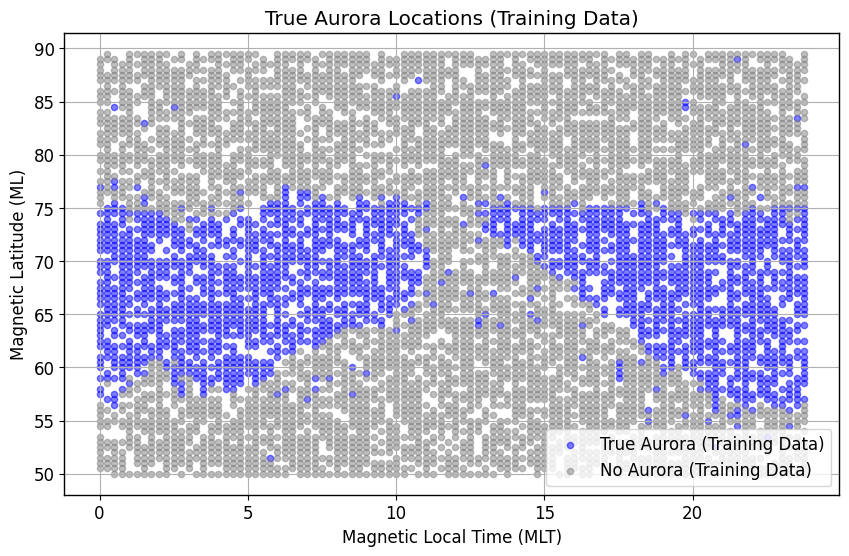

In [ ]:
# Create binary labels: eflux > 0.5 mW/m^2 indicates aurora (adjust threshold as needed)
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Normalize the input features (MLT, ML)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Plot training data (true aurora locations) before model creation
X_train_orig = scaler.inverse_transform(X_train)  # Inverse transform X_train to original MLT, ML
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train_orig[y_train == 1, 0], X_train_orig[y_train == 1, 1],
    c='blue', label='True Aurora (Training Data)', alpha=0.5, s=20
)
plt.scatter(
    X_train_orig[y_train == 0, 0], X_train_orig[y_train == 0, 1],
    c='gray', label='No Aurora (Training Data)', alpha=0.5, s=20
)
plt.xlabel('Magnetic Local Time (MLT)')
plt.ylabel('Magnetic Latitude (ML)')
plt.title('True Aurora Locations (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),  # Hidden layer with 16 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')                   # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5265 - loss: 0.6866 - val_accuracy: 0.7006 - val_loss: 0.5637
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.5423 - val_accuracy: 0.7030 - val_loss: 0.4885
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7180 - loss: 0.4786 - val_accuracy: 0.7966 - val_loss: 0.4290
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8126 - loss: 0.4191 - val_accuracy: 0.8511 - val_loss: 0.3804
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8679 - loss: 0.3701 - val_accuracy: 0.8788 - val_loss: 0.3433
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8828 - loss: 0.3326 - val_accuracy: 0.8869 - val_loss: 0.3158
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3085 - val_accuracy: 0.8902 - val_loss: 0.2958
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8906 - loss: 0.2801 - val_accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8997


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


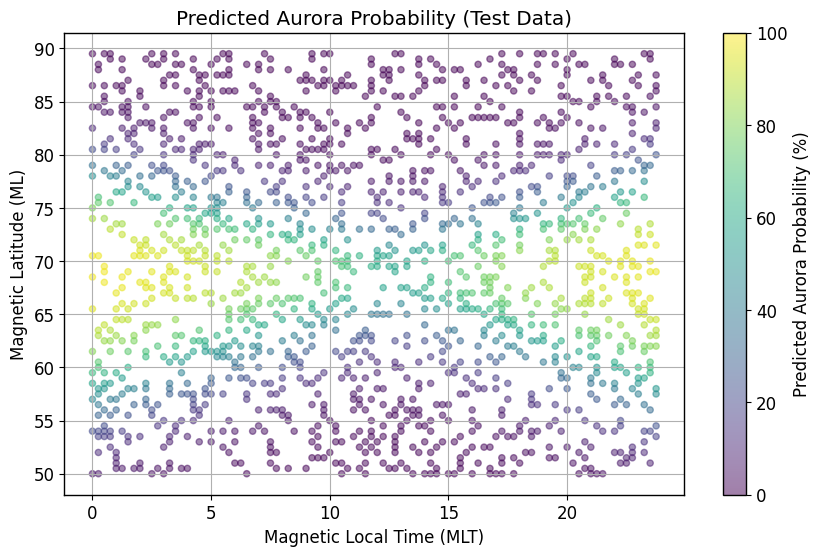

In [ ]:
# Make predictions (probabilities)
y_pred_prob_test = model.predict(X_test).flatten()  # Probabilities between 0 and 1
y_pred_percent_test = y_pred_prob_test * 100            # Convert to percentages

# Make predictions for training data
y_pred_prob_train = model.predict(X_train).flatten()  # Probabilities for training data
y_pred_percent_train = y_pred_prob_train * 100       # Convert to percentages

# Visualize test data results
X_test_orig = scaler.inverse_transform(X_test)  # Inverse transform X_test
plt.figure(figsize=(10, 6))
scatter_test = plt.scatter(
    X_test_orig[:, 0], X_test_orig[:, 1],
    c=y_pred_percent_test, cmap='viridis',
    alpha=0.5, s=20, vmin=0, vmax=100
)
plt.colorbar(scatter_test, label='Predicted Aurora Probability (%)')
plt.xlabel('Magnetic Local Time (MLT)')
plt.ylabel('Magnetic Latitude (ML)')
plt.title('Predicted Aurora Probability (Test Data)')
plt.grid(True)
plt.show()

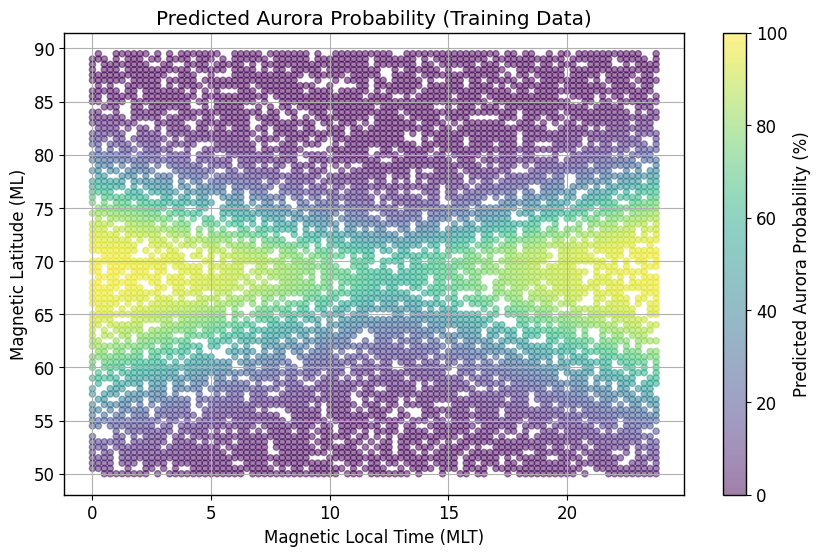

In [ ]:
# Visualize training data results
X_train_orig = scaler.inverse_transform(X_train)  # Inverse transform X_train
plt.figure(figsize=(10, 6))
scatter_train = plt.scatter(
    X_train_orig[:, 0], X_train_orig[:, 1],
    c=y_pred_percent_train, cmap='viridis',
    alpha=0.5, s=20, vmin=0, vmax=100
)
plt.colorbar(scatter_train, label='Predicted Aurora Probability (%)')
plt.xlabel('Magnetic Local Time (MLT)')
plt.ylabel('Magnetic Latitude (ML)')
plt.title('Predicted Aurora Probability (Training Data)')
plt.grid(True)
plt.show()

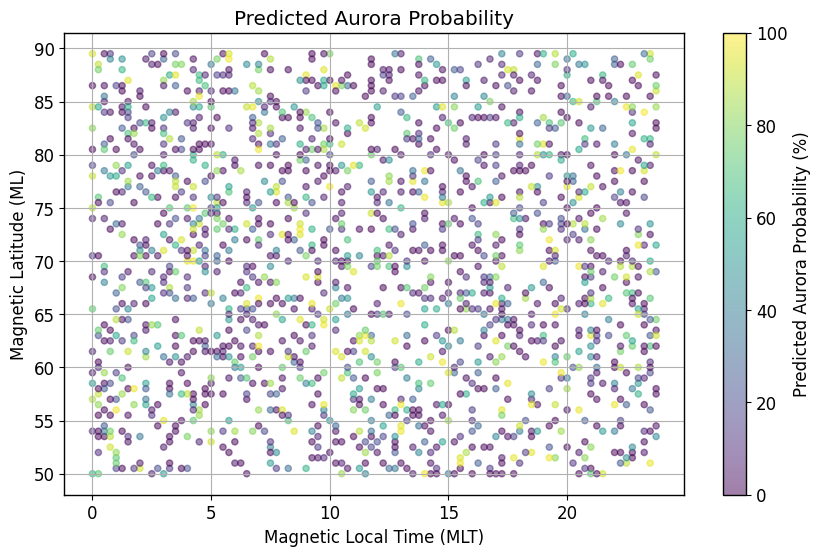

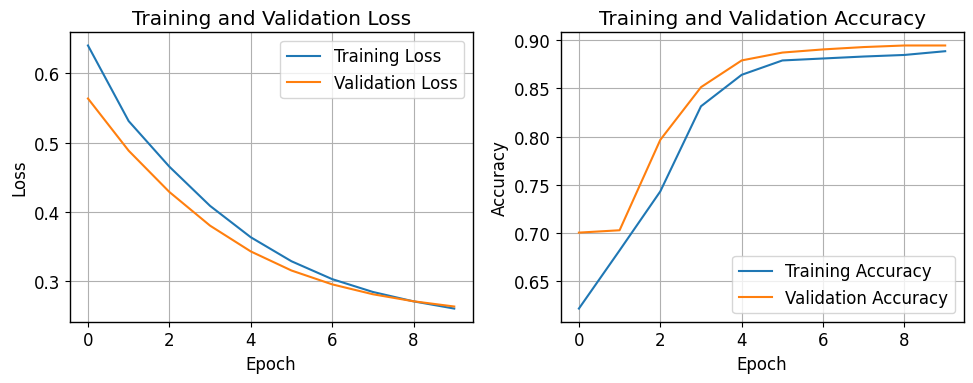

In [ ]:
# Plot predicted aurora probabilities
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_test_orig[:, 0], X_test_orig[:, 1],
    c=y_pred_percent, cmap='viridis',
    alpha=0.5, s=20, vmin=0, vmax=100
)
plt.colorbar(scatter, label='Predicted Aurora Probability (%)')
plt.xlabel('Magnetic Local Time (MLT)')
plt.ylabel('Magnetic Latitude (ML)')
plt.title('Predicted Aurora Probability')
plt.grid(True)
plt.show()

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()